In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
import joblib

In [7]:
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai Property Data.csv")

In [8]:
print("size of df : " , df.shape)
print("df type of each colum in the df : ",df.dtypes)
print("no of null values :", df.isnull().sum())
duplicate_values = df.duplicated().sum()
print("no of duplicated values",duplicate_values)
numerical_summary = df.describe().T
print("Summary statistics for numerical columns:")
print(numerical_summary)

# Add mode and quartiles
mode = df.mode().iloc[0]  # Mode of each column
numerical_summary['Mode'] = mode
print("Updated summary statistics with mode:")
print(numerical_summary)


size of df :  (8189, 8)
df type of each colum in the df :  Locality          object
Quarter           object
Price Range       object
Average Price     object
Q-o-Q             object
Growth Type      float64
City              object
Type              object
dtype: object
no of null values : Locality          241
Quarter           241
Price Range       856
Average Price     856
Q-o-Q            1454
Growth Type      8189
City             6256
Type             6717
dtype: int64
no of duplicated values 239
Summary statistics for numerical columns:
             count  mean  std  min  25%  50%  75%  max
Growth Type    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Updated summary statistics with mode:
             count  mean  std  min  25%  50%  75%  max Mode
Growth Type    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


In [9]:
df.describe()

,Growth Type
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [10]:
# df.drop(columns=['City','Type'])
df

,Locality,Quarter,Price Range,Average Price,Q-o-Q,Growth Type,City,Type
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066","22,666",6%,NaN,Mumbai,Residential - Multi Storey Apartment
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163","21,347",1%,NaN,Mumbai,Residential - Multi Storey Apartment
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342","21,591",6%,NaN,Mumbai,Residential - Multi Storey Apartment
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990","20,439",-,NaN,Mumbai,Residential - Multi Storey Apartment
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000","19,750",-1%,NaN,Mumbai,Residential - Multi Storey Apartment
...,...,...,...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584","22,979",3%,NaN,NaN,NaN
8185,Yari Road,Apr-Jun 2019,"17,412-27,268","22,340",1%,NaN,NaN,NaN
8186,Yari Road,Jan-Mar 2019,"17,696-27,222","22,459",4%,NaN,NaN,NaN
8187,Yari Road,Oct-Dec 2018,"17,718-29,000","23,359",0.30%,NaN,NaN,NaN


In [11]:
df.drop(columns=['Q-o-Q','Growth Type'], inplace= True)

In [12]:
df

,Locality,Quarter,Price Range,Average Price,City,Type
0,90 Feet Road,Jul-Sep 2024,"16,266-29,066","22,666",Mumbai,Residential - Multi Storey Apartment
1,90 Feet Road,Apr-Jun 2024,"15,531-27,163","21,347",Mumbai,Residential - Multi Storey Apartment
2,90 Feet Road,Jan-Mar 2024,"15,841-27,342","21,591",Mumbai,Residential - Multi Storey Apartment
3,90 Feet Road,Oct-Dec 2023,"14,887-25,990","20,439",Mumbai,Residential - Multi Storey Apartment
4,90 Feet Road,Jul-Sep 2023,"14,500-25,000","19,750",Mumbai,Residential - Multi Storey Apartment
...,...,...,...,...,...,...
8184,Yari Road,Jul-Sep 2019,"17,375-28,584","22,979",NaN,NaN
8185,Yari Road,Apr-Jun 2019,"17,412-27,268","22,340",NaN,NaN
8186,Yari Road,Jan-Mar 2019,"17,696-27,222","22,459",NaN,NaN
8187,Yari Road,Oct-Dec 2018,"17,718-29,000","23,359",NaN,NaN


In [13]:
df['Month'] = df['Quarter'].str.split(' ', expand=True)[0] 
df['Year'] = df['Quarter'].str.split(' ', expand=True)[1]   

In [14]:
df.drop(columns=['Quarter'])

,Locality,Price Range,Average Price,City,Type,Month,Year
0,90 Feet Road,"16,266-29,066","22,666",Mumbai,Residential - Multi Storey Apartment,Jul-Sep,2024
1,90 Feet Road,"15,531-27,163","21,347",Mumbai,Residential - Multi Storey Apartment,Apr-Jun,2024
2,90 Feet Road,"15,841-27,342","21,591",Mumbai,Residential - Multi Storey Apartment,Jan-Mar,2024
3,90 Feet Road,"14,887-25,990","20,439",Mumbai,Residential - Multi Storey Apartment,Oct-Dec,2023
4,90 Feet Road,"14,500-25,000","19,750",Mumbai,Residential - Multi Storey Apartment,Jul-Sep,2023
...,...,...,...,...,...,...,...
8184,Yari Road,"17,375-28,584","22,979",NaN,NaN,Jul-Sep,2019
8185,Yari Road,"17,412-27,268","22,340",NaN,NaN,Apr-Jun,2019
8186,Yari Road,"17,696-27,222","22,459",NaN,NaN,Jan-Mar,2019
8187,Yari Road,"17,718-29,000","23,359",NaN,NaN,Oct-Dec,2018


In [15]:
df.drop(columns=['Quarter'],inplace=True)

In [16]:
df

,Locality,Price Range,Average Price,City,Type,Month,Year
0,90 Feet Road,"16,266-29,066","22,666",Mumbai,Residential - Multi Storey Apartment,Jul-Sep,2024
1,90 Feet Road,"15,531-27,163","21,347",Mumbai,Residential - Multi Storey Apartment,Apr-Jun,2024
2,90 Feet Road,"15,841-27,342","21,591",Mumbai,Residential - Multi Storey Apartment,Jan-Mar,2024
3,90 Feet Road,"14,887-25,990","20,439",Mumbai,Residential - Multi Storey Apartment,Oct-Dec,2023
4,90 Feet Road,"14,500-25,000","19,750",Mumbai,Residential - Multi Storey Apartment,Jul-Sep,2023
...,...,...,...,...,...,...,...
8184,Yari Road,"17,375-28,584","22,979",NaN,NaN,Jul-Sep,2019
8185,Yari Road,"17,412-27,268","22,340",NaN,NaN,Apr-Jun,2019
8186,Yari Road,"17,696-27,222","22,459",NaN,NaN,Jan-Mar,2019
8187,Yari Road,"17,718-29,000","23,359",NaN,NaN,Oct-Dec,2018


In [17]:
# from sklearn.preprocessing import LabelEncoder
# location_encoder = LabelEncoder()
# df['Locality'] = location_encoder.fit_transform(df['Locality'])
# print(df.head)
# joblib.dump(location_encoder,'location_encoding_test.pkl')

In [18]:
import numpy as np
df['Average Price'] = df['Average Price'].replace('-', np.nan)
df['Average Price'] = df['Average Price'].str.replace(',', '').astype(float)

In [19]:
df['Price Range'] = df['Price Range'].replace('-', '0-0').fillna('0-0')
df['Min Price'] = df['Price Range'].str.split('-').str[0].str.replace(',', '').replace('', '0').astype(float)
df['Max Price'] = df['Price Range'].str.split('-').str[1].str.replace(',', '').replace('', '0').astype(float)


In [20]:
print(df.isnull().sum())
df = df.dropna(subset=['Average Price', 'Min Price', 'Max Price'])


Locality          241
Price Range         0
Average Price    1983
City             6256
Type             6717
Month             241
Year              241
Min Price           0
Max Price           0
dtype: int64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1517563059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_Encoded'] = df['Month'].map({


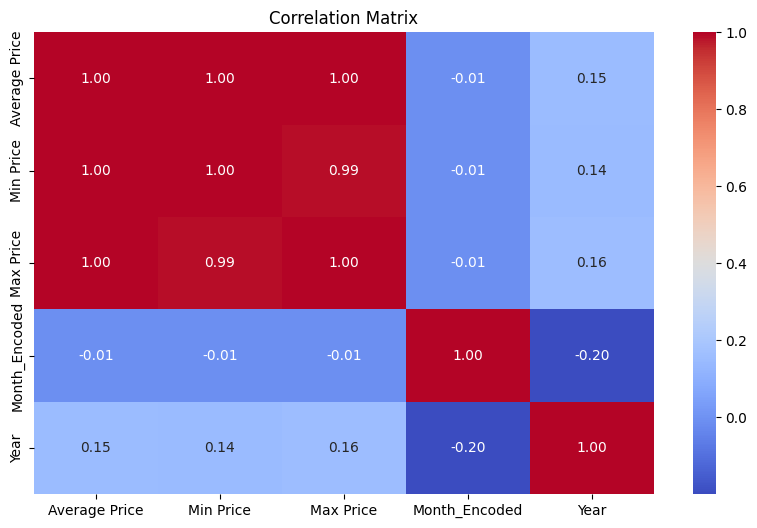

In [21]:
df['Month_Encoded'] = df['Month'].map({
    'Jan-Mar': 1,
    'Apr-Jun': 2,
    'Jul-Sep': 3,
    'Oct-Dec': 4
})
# df['City_Encoded'] = df['City'].factorize()[0]
# df['Type_Encoded'] = df['Type'].factorize()[0]

# Select numerical columns for correlation analysis
numerical_cols = ['Average Price', 'Min Price', 'Max Price', 'Month_Encoded', 'Year']

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.drop(columns=['Price Range','City','Type'],inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1663544092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Price Range','City','Type'],inplace=True)


In [23]:
df

,Locality,Average Price,Month,Year,Min Price,Max Price,Month_Encoded
0,90 Feet Road,22666.0,Jul-Sep,2024,16266.0,29066.0,3.0
1,90 Feet Road,21347.0,Apr-Jun,2024,15531.0,27163.0,2.0
2,90 Feet Road,21591.0,Jan-Mar,2024,15841.0,27342.0,1.0
3,90 Feet Road,20439.0,Oct-Dec,2023,14887.0,25990.0,4.0
4,90 Feet Road,19750.0,Jul-Sep,2023,14500.0,25000.0,3.0
...,...,...,...,...,...,...,...
8184,Yari Road,22979.0,Jul-Sep,2019,17375.0,28584.0,3.0
8185,Yari Road,22340.0,Apr-Jun,2019,17412.0,27268.0,2.0
8186,Yari Road,22459.0,Jan-Mar,2019,17696.0,27222.0,1.0
8187,Yari Road,23359.0,Oct-Dec,2018,17718.0,29000.0,4.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   object 
 1   Average Price  6206 non-null   float64
 2   Month          6206 non-null   object 
 3   Year           6206 non-null   object 
 4   Min Price      6206 non-null   float64
 5   Max Price      6206 non-null   float64
 6   Month_Encoded  6204 non-null   float64
dtypes: float64(4), object(3)
memory usage: 387.9+ KB


In [25]:
df['Year'] = df['Year'].astype('float64')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\2649418009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('float64')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6206 entries, 0 to 8188
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Locality       6206 non-null   object 
 1   Average Price  6206 non-null   float64
 2   Month          6206 non-null   object 
 3   Year           6206 non-null   float64
 4   Min Price      6206 non-null   float64
 5   Max Price      6206 non-null   float64
 6   Month_Encoded  6204 non-null   float64
dtypes: float64(5), object(2)
memory usage: 387.9+ KB


In [27]:
df

,Locality,Average Price,Month,Year,Min Price,Max Price,Month_Encoded
0,90 Feet Road,22666.0,Jul-Sep,2024.0,16266.0,29066.0,3.0
1,90 Feet Road,21347.0,Apr-Jun,2024.0,15531.0,27163.0,2.0
2,90 Feet Road,21591.0,Jan-Mar,2024.0,15841.0,27342.0,1.0
3,90 Feet Road,20439.0,Oct-Dec,2023.0,14887.0,25990.0,4.0
4,90 Feet Road,19750.0,Jul-Sep,2023.0,14500.0,25000.0,3.0
...,...,...,...,...,...,...,...
8184,Yari Road,22979.0,Jul-Sep,2019.0,17375.0,28584.0,3.0
8185,Yari Road,22340.0,Apr-Jun,2019.0,17412.0,27268.0,2.0
8186,Yari Road,22459.0,Jan-Mar,2019.0,17696.0,27222.0,1.0
8187,Yari Road,23359.0,Oct-Dec,2018.0,17718.0,29000.0,4.0


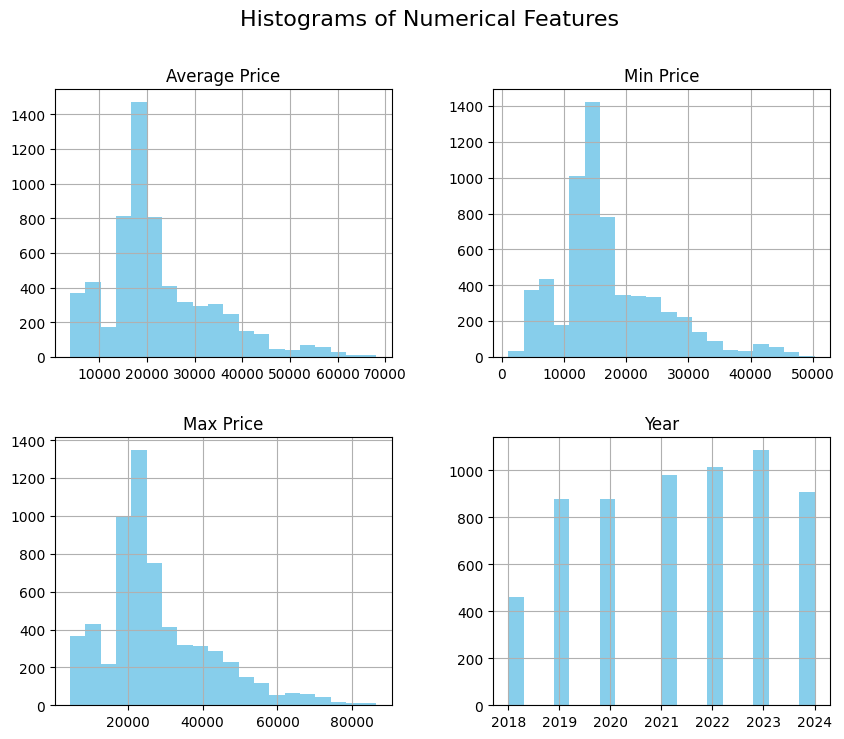

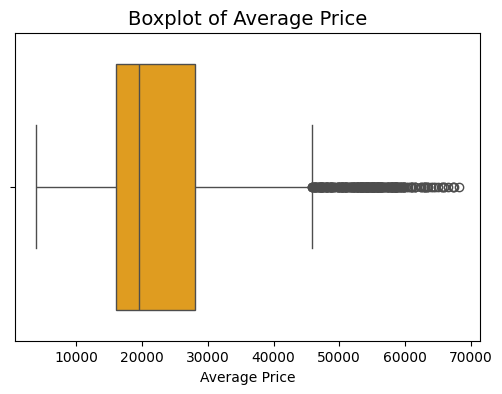

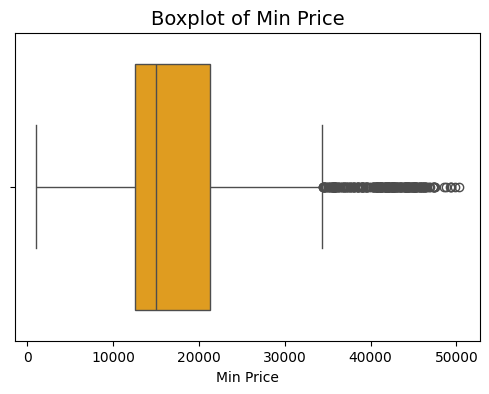

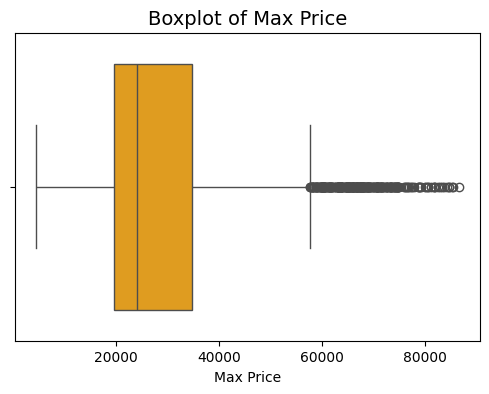

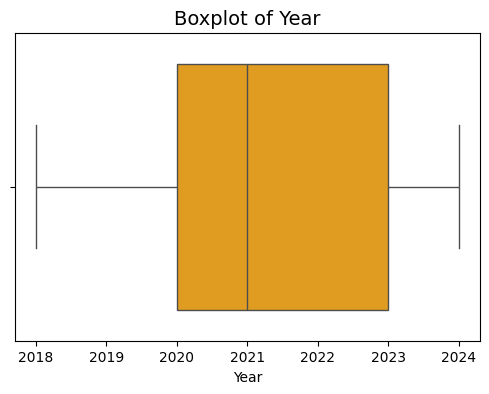

In [28]:
# Plot histograms for numerical columns
numerical_features = ['Average Price', 'Min Price', 'Max Price', 'Year']
df[numerical_features].hist(bins=20, figsize=(10, 8), color='skyblue')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Box plots for numerical columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.show()


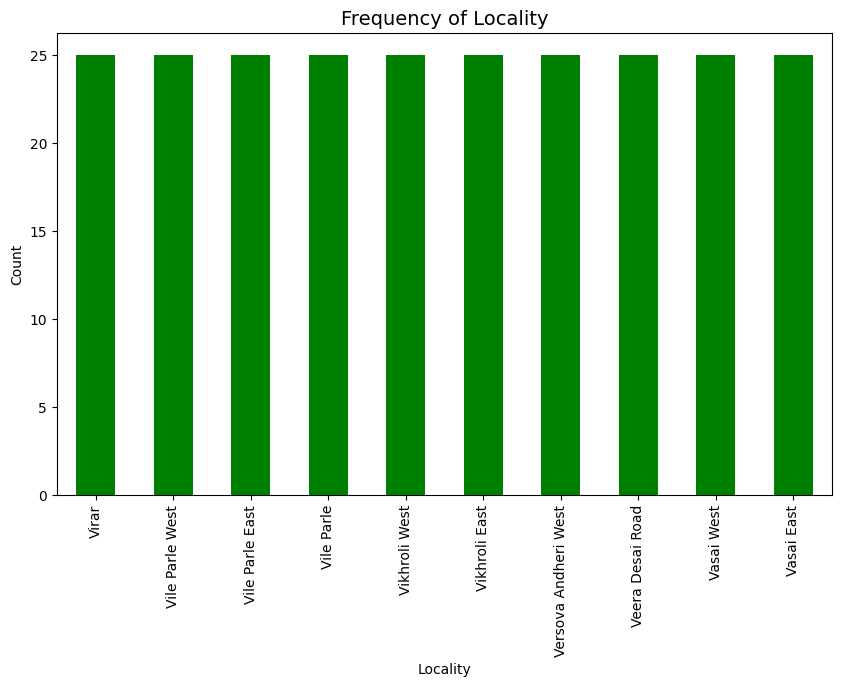

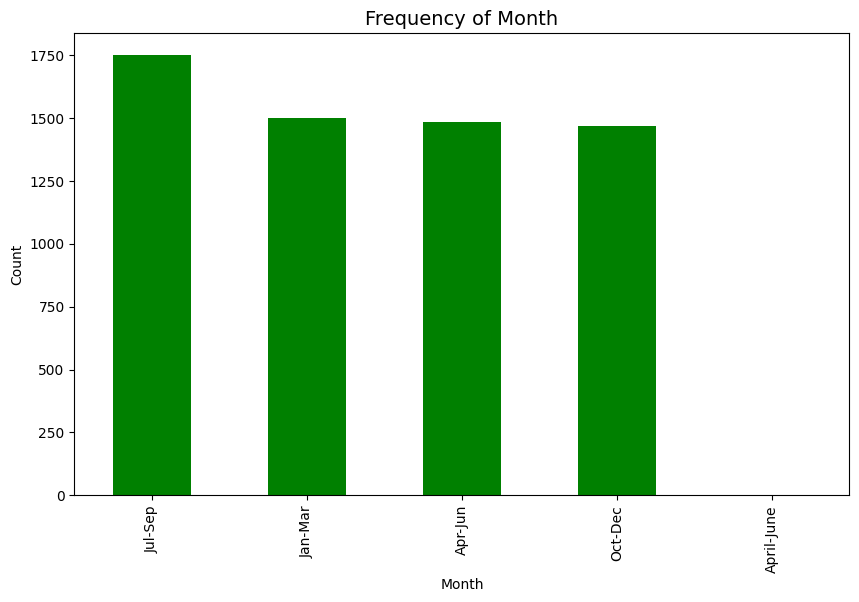

In [29]:
# Frequency tables and bar charts for categorical columns
categorical_features = ['Locality', 'Month']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().head(10).plot(kind='bar', color='green')
    plt.title(f'Frequency of {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


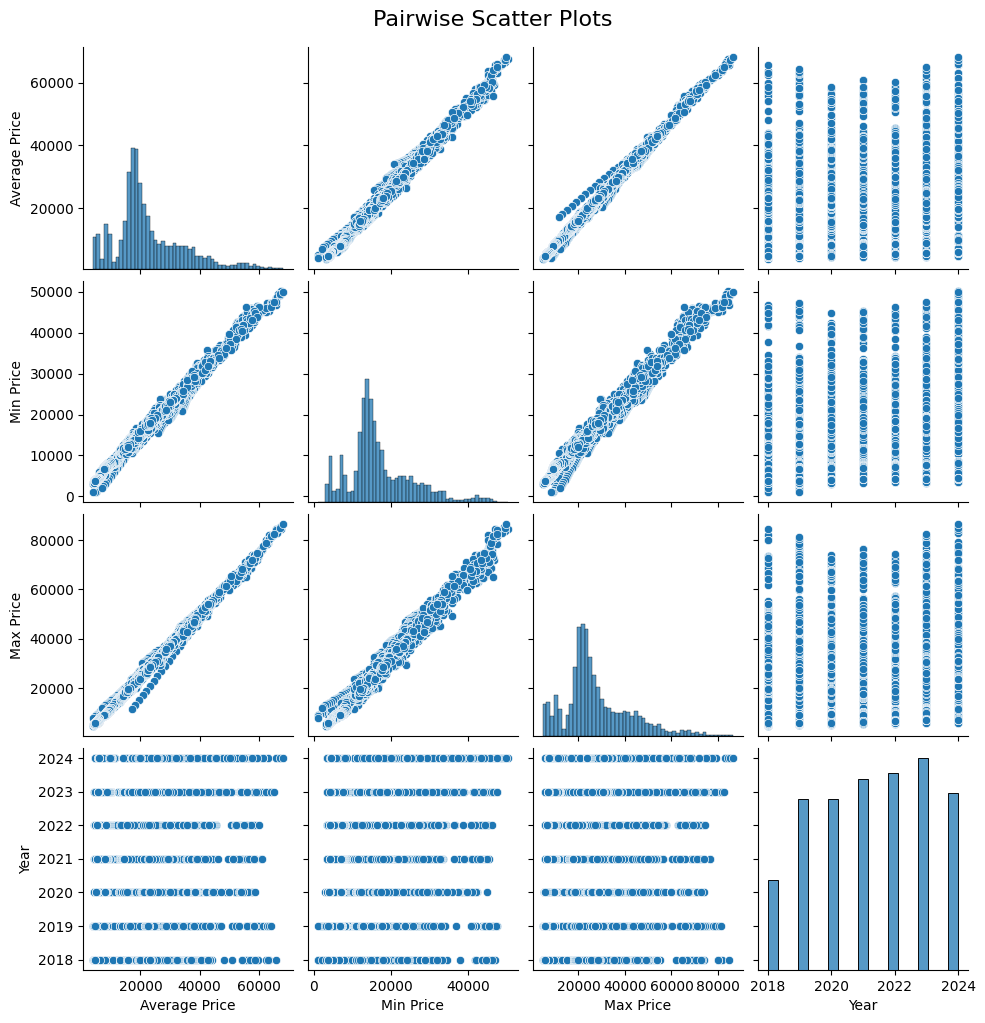

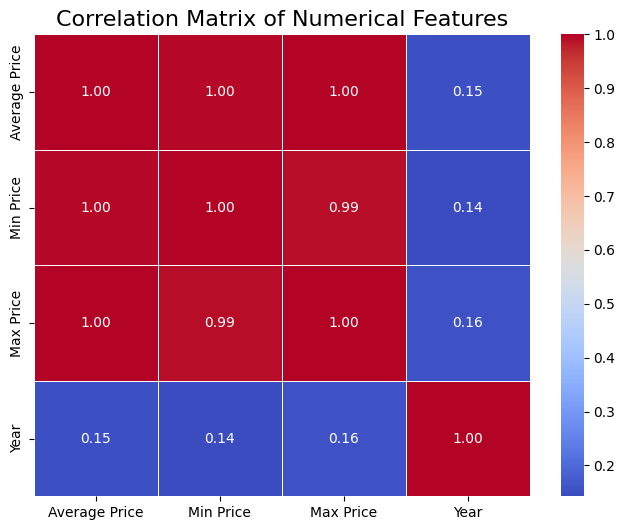

In [30]:
# Scatter plot to visualize relationships between numerical features
sns.pairplot(df[numerical_features])
plt.suptitle('Pairwise Scatter Plots', y=1.02, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1340889095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=feature, data=df, palette='Set2')


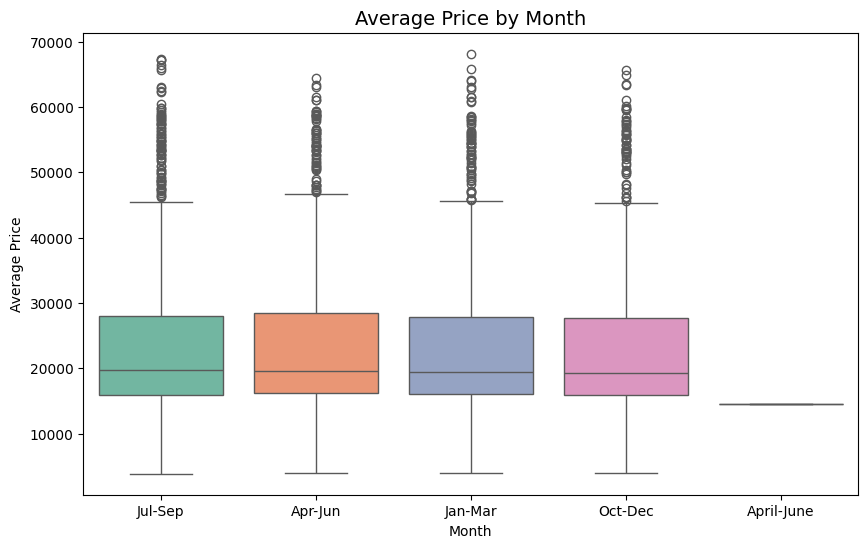

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1340889095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=feature, data=df, palette='Set2')


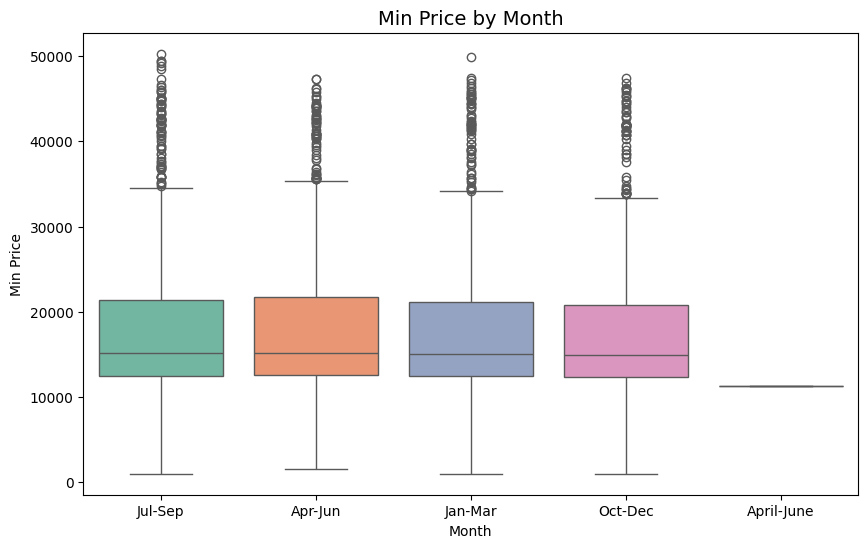

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1340889095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=feature, data=df, palette='Set2')


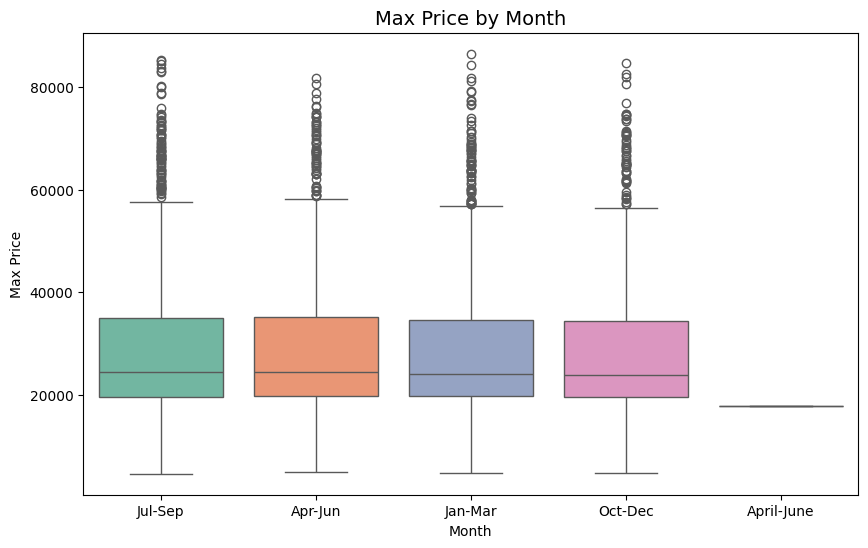

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1340889095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y=feature, data=df, palette='Set2')


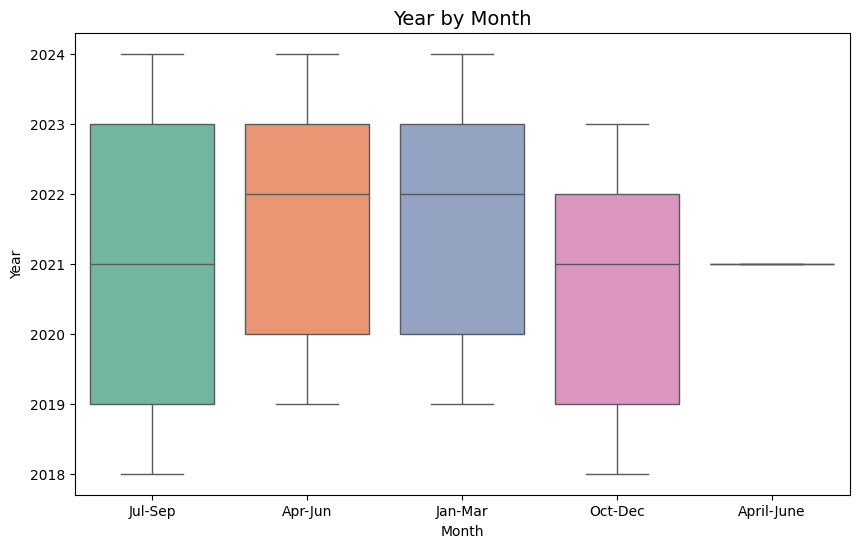

In [31]:
# Box plots to compare numerical features across categories
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Month', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Month', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel(feature)
    plt.show()


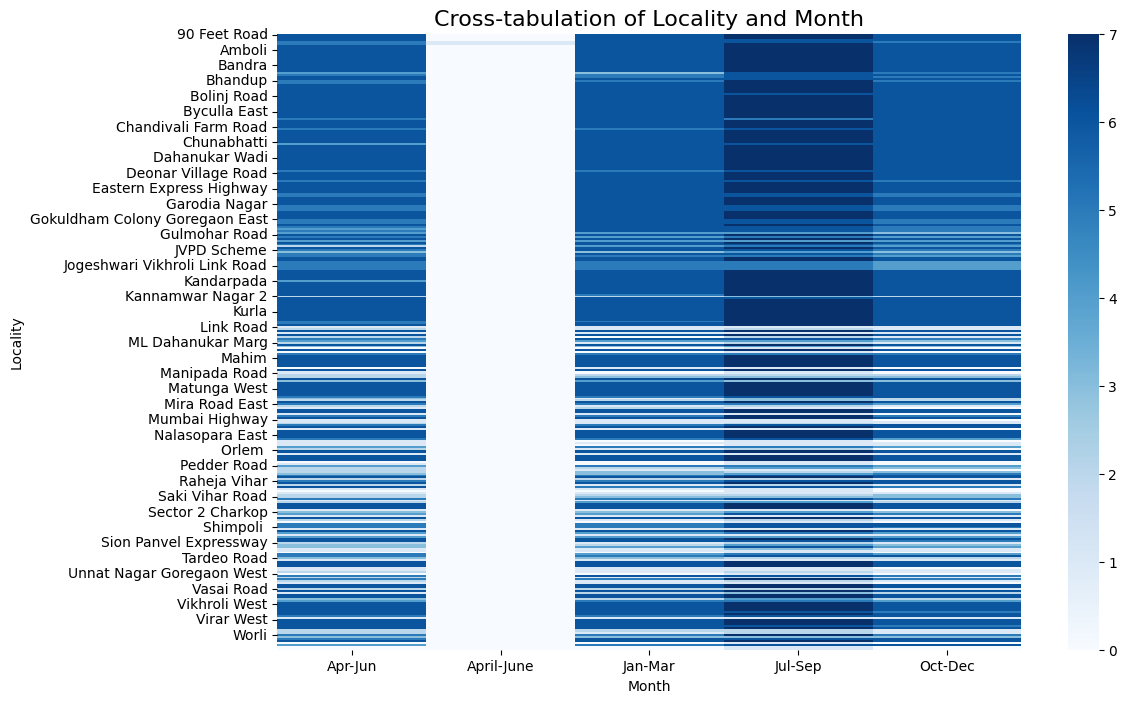

In [32]:
# Cross-tabulation and heatmap
cross_tab = pd.crosstab(df['Locality'], df['Month'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Blues', annot=False, cbar=True)
plt.title('Cross-tabulation of Locality and Month', fontsize=16)
plt.show()


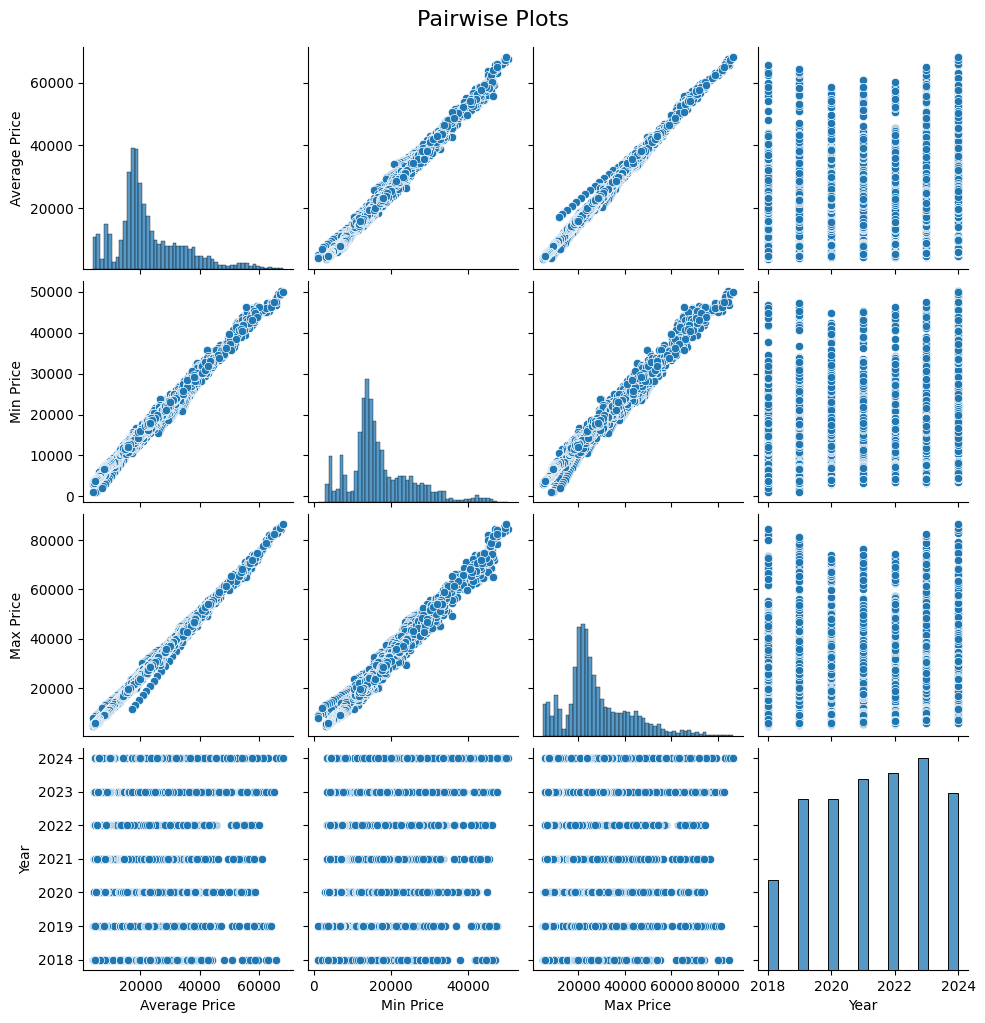

In [33]:
# Pair plot for selected features
selected_features = ['Average Price', 'Min Price', 'Max Price', 'Year']
sns.pairplot(df[selected_features])
plt.suptitle('Pairwise Plots', y=1.02, fontsize=16)
plt.show()


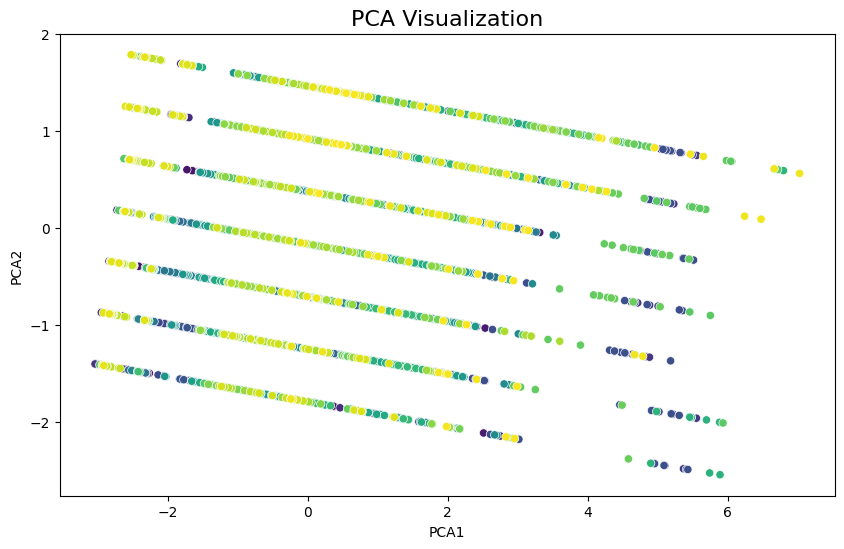

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Locality'] = df['Locality']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Locality', data=pca_df, legend=False, palette='viridis')
plt.title('PCA Visualization', fontsize=16)
plt.show()


In [35]:
df = df.drop(df[df['Month'] == 'April-June'].index)

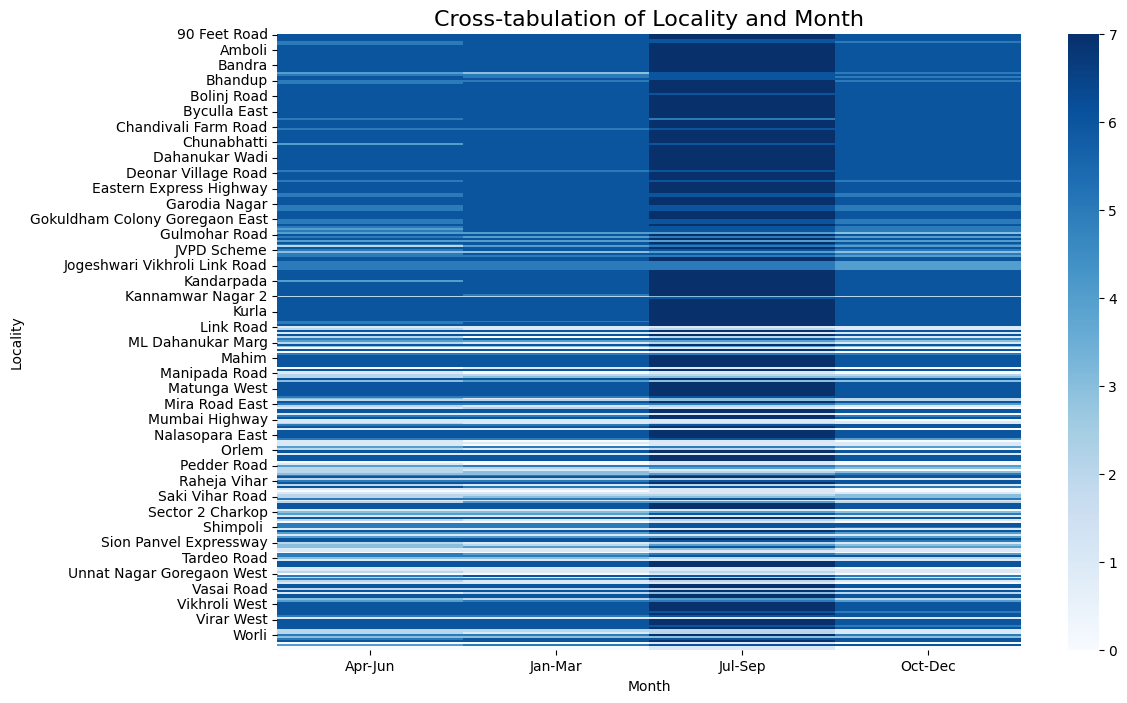

In [36]:
# Cross-tabulation and heatmap
cross_tab = pd.crosstab(df['Locality'], df['Month'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Blues', annot=False, cbar=True)
plt.title('Cross-tabulation of Locality and Month', fontsize=16)
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Average Price', 'Min Price', 'Max Price']
scaler = MinMaxScaler(feature_range=(1, 10))
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
joblib.dump(scaler,'Mumbai_price_scaling.pkl')

['Mumbai_price_scaling.pkl']

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Locality'] = encoder.fit_transform(df['Locality'])
scaler = MinMaxScaler(feature_range=(1,10))
df[['Locality']] = scaler.fit_transform(df[['Locality']])
joblib.dump(encoder,'Mumbai_locality_encoding.pkl')
joblib.dump(scaler,'Mumbai_locality_scaling.pkl')


['Mumbai_locality_scaling.pkl']

In [39]:
df

,Locality,Average Price,Month,Year,Min Price,Max Price,Month_Encoded
0,1.000000,3.630606,Jul-Sep,2024.0,3.788084,3.689589,3.0
1,1.000000,3.445955,Apr-Jun,2024.0,3.653848,3.480389,2.0
2,1.000000,3.480113,Jan-Mar,2024.0,3.710465,3.500067,1.0
3,1.000000,3.318841,Oct-Dec,2023.0,3.536232,3.351439,4.0
4,1.000000,3.222386,Jul-Sep,2023.0,3.465553,3.242607,3.0
...,...,...,...,...,...,...,...
8184,9.943574,3.674423,Jul-Sep,2019.0,3.990625,3.636602,3.0
8185,9.943574,3.584968,Apr-Jun,2019.0,3.997382,3.491932,2.0
8186,9.943574,3.601627,Jan-Mar,2019.0,4.049250,3.486875,1.0
8187,9.943574,3.727621,Oct-Dec,2018.0,4.053268,3.682334,4.0


In [40]:
month_mapping = {
    "Jan-Mar": 1,
    "Apr-Jun": 2,
    "Jul-Sep": 3,
    "Oct-Dec": 4
}
df['Month_Mapped'] = df['Month'].map(month_mapping)

In [41]:
df

,Locality,Average Price,Month,Year,Min Price,Max Price,Month_Encoded,Month_Mapped
0,1.000000,3.630606,Jul-Sep,2024.0,3.788084,3.689589,3.0,3
1,1.000000,3.445955,Apr-Jun,2024.0,3.653848,3.480389,2.0,2
2,1.000000,3.480113,Jan-Mar,2024.0,3.710465,3.500067,1.0,1
3,1.000000,3.318841,Oct-Dec,2023.0,3.536232,3.351439,4.0,4
4,1.000000,3.222386,Jul-Sep,2023.0,3.465553,3.242607,3.0,3
...,...,...,...,...,...,...,...,...
8184,9.943574,3.674423,Jul-Sep,2019.0,3.990625,3.636602,3.0,3
8185,9.943574,3.584968,Apr-Jun,2019.0,3.997382,3.491932,2.0,2
8186,9.943574,3.601627,Jan-Mar,2019.0,4.049250,3.486875,1.0,1
8187,9.943574,3.727621,Oct-Dec,2018.0,4.053268,3.682334,4.0,4


In [42]:
df.drop(columns=['Month'])

,Locality,Average Price,Year,Min Price,Max Price,Month_Encoded,Month_Mapped
0,1.000000,3.630606,2024.0,3.788084,3.689589,3.0,3
1,1.000000,3.445955,2024.0,3.653848,3.480389,2.0,2
2,1.000000,3.480113,2024.0,3.710465,3.500067,1.0,1
3,1.000000,3.318841,2023.0,3.536232,3.351439,4.0,4
4,1.000000,3.222386,2023.0,3.465553,3.242607,3.0,3
...,...,...,...,...,...,...,...
8184,9.943574,3.674423,2019.0,3.990625,3.636602,3.0,3
8185,9.943574,3.584968,2019.0,3.997382,3.491932,2.0,2
8186,9.943574,3.601627,2019.0,4.049250,3.486875,1.0,1
8187,9.943574,3.727621,2018.0,4.053268,3.682334,4.0,4


In [43]:
df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min()))
df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] - df['Year'].min()) / (df['Year'].max() - df['Year'].min()))


In [44]:
df

,Locality,Average Price,Month,Year,Min Price,Max Price,Month_Encoded,Month_Mapped,Year_sin,Year_cos
0,1.000000,3.630606,Jul-Sep,2024.0,3.788084,3.689589,3.0,3,-2.449294e-16,1.0
1,1.000000,3.445955,Apr-Jun,2024.0,3.653848,3.480389,2.0,2,-2.449294e-16,1.0
2,1.000000,3.480113,Jan-Mar,2024.0,3.710465,3.500067,1.0,1,-2.449294e-16,1.0
3,1.000000,3.318841,Oct-Dec,2023.0,3.536232,3.351439,4.0,4,-8.660254e-01,0.5
4,1.000000,3.222386,Jul-Sep,2023.0,3.465553,3.242607,3.0,3,-8.660254e-01,0.5
...,...,...,...,...,...,...,...,...,...,...
8184,9.943574,3.674423,Jul-Sep,2019.0,3.990625,3.636602,3.0,3,8.660254e-01,0.5
8185,9.943574,3.584968,Apr-Jun,2019.0,3.997382,3.491932,2.0,2,8.660254e-01,0.5
8186,9.943574,3.601627,Jan-Mar,2019.0,4.049250,3.486875,1.0,1,8.660254e-01,0.5
8187,9.943574,3.727621,Oct-Dec,2018.0,4.053268,3.682334,4.0,4,0.000000e+00,1.0


In [45]:
df.drop(columns=['Year','Month','Month_Mapped'],inplace=True)

In [46]:
# df.drop(columns=['Month_Mapped'],inplace=True)

In [47]:
df

,Locality,Average Price,Min Price,Max Price,Month_Encoded,Year_sin,Year_cos
0,1.000000,3.630606,3.788084,3.689589,3.0,-2.449294e-16,1.0
1,1.000000,3.445955,3.653848,3.480389,2.0,-2.449294e-16,1.0
2,1.000000,3.480113,3.710465,3.500067,1.0,-2.449294e-16,1.0
3,1.000000,3.318841,3.536232,3.351439,4.0,-8.660254e-01,0.5
4,1.000000,3.222386,3.465553,3.242607,3.0,-8.660254e-01,0.5
...,...,...,...,...,...,...,...
8184,9.943574,3.674423,3.990625,3.636602,3.0,8.660254e-01,0.5
8185,9.943574,3.584968,3.997382,3.491932,2.0,8.660254e-01,0.5
8186,9.943574,3.601627,4.049250,3.486875,1.0,8.660254e-01,0.5
8187,9.943574,3.727621,4.053268,3.682334,4.0,0.000000e+00,1.0


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Locality', 'Month_Encoded', 'Year_sin', 'Year_cos']
target = 'Average Price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mape = (abs((y_test - y_pred) / y_test).mean()) * 100

print("Model Performance:") 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


metrics = {
    "mae" : mae,
    "mape" : mape,
    "mse" : mse,
    "r2" : r2
}

import joblib
joblib.dump(model, "Mumbai_Prediction_Model.pkl")


Model Performance:
Mean Absolute Error (MAE): 0.15002448389498824
Mean Squared Error (MSE): 0.10020343778272722
R² Score: 0.9610463412643537
Mean Absolute Percentage Error (MAPE): 4.022879456267836%


['Mumbai_Prediction_Model.pkl']

In [64]:
import pandas as pd
import numpy as np
import joblib

encoder = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_locality_encoding.pkl')
scaler = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_locality_scaling.pkl')
price_scaler = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_price_scaling.pkl')
month_mapping = {
    'Jan-Mar': 1,
    'Apr-Jun': 2,
    'Jul-Sep': 3,
    'Oct-Dec': 4
}

def compute_year_sin_cos(year):
    base_year = 2019
    period = 6  
    year_index = year - base_year
    year_sin = np.sin(2 * np.pi * year_index / period)
    year_cos = np.cos(2 * np.pi * year_index / period)
    return year_sin, year_cos
def predict_price(location, year, quarter):
    location_encoded = encoder.transform([location])[0]
    location_scaled = scaler.transform([[location_encoded]])[0][0]  # Scaling after encoding

    month_encoded = month_mapping.get(quarter, None)
    if month_encoded is None:
        raise ValueError("Invalid quarter provided. Must be 'Jan-Mar', 'Apr-Jun', 'Jul-Sep', or 'Oct-Dec'.")

    year_sin, year_cos = compute_year_sin_cos(year)

    input_data = pd.DataFrame([[location_scaled, month_encoded, year_sin, year_cos]],
                              columns=['Locality', 'Month_Encoded', 'Year_sin', 'Year_cos'])

    model = joblib.load("C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_Prediction_Model.pkl")

    predicted_price_scaled = model.predict(input_data)[0]

    temp_data = [[predicted_price_scaled, None, None]]  
    predicted_price = price_scaler.inverse_transform(temp_data)[0][0]

    return predicted_price

location = '90 Feet Road'
year = 2028
quarter = 'Jul-Sep'

predicted_price = predict_price(location, year, quarter)
print(f"Predicted Average Price for {location} in {quarter} {year}: ₹{predicted_price}")


Predicted Average Price for 90 Feet Road in Jul-Sep 2028: ₹16859.0


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [54]:
import pandas as pd
import numpy as np
import joblib

encoder = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_locality_encoding.pkl')
scaler = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_locality_scaling.pkl')
price_scaler = joblib.load('C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_price_scaling.pkl')

month_mapping = {
    'Jan-Mar': 1,
    'Apr-Jun': 2,
    'Jul-Sep': 3,
    'Oct-Dec': 4
}

def compute_year_sin_cos(year):
    base_year = 2019
    period = 6  
    year_index = year - base_year
    year_sin = np.sin(2 * np.pi * year_index / period)
    year_cos = np.cos(2 * np.pi * year_index / period)
    return year_sin, year_cos

def predict_price(location, year, quarter, historical_data):
    # Encode and scale locality
    location_encoded = encoder.transform([location])[0]
    location_scaled = scaler.transform([[location_encoded]])[0][0]  # Scaling after encoding

    month_encoded = month_mapping.get(quarter, None)
    if month_encoded is None:
        raise ValueError("Invalid quarter provided. Must be 'Jan-Mar', 'Apr-Jun', 'Jul-Sep', or 'Oct-Dec'.")

    year_sin, year_cos = compute_year_sin_cos(year)

    input_data = pd.DataFrame([[location_scaled, month_encoded, year_sin, year_cos]],
                              columns=['Locality', 'Month_Encoded', 'Year_sin', 'Year_cos'])

    model = joblib.load("C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai_Prediction_Model.pkl")

    predicted_price_scaled = model.predict(input_data)[0]

    temp_data = [[predicted_price_scaled, None, None]]  
    predicted_price = price_scaler.inverse_transform(temp_data)[0][0]

    locality_data = historical_data[historical_data['Locality'] == location]
    if locality_data.empty:
        raise ValueError(f"No historical data available for {location}.")
 
    locality_data['Price Range'] = locality_data['Price Range'].str.replace(',', '', regex=False)
    locality_data[['Min Price', 'Max Price']] = locality_data['Price Range'].str.split('-', expand=True).astype(float)
    locality_data['Average Price'] = locality_data['Average Price'].str.replace(',', '', regex=False).astype(float)

    min_price_factor = locality_data['Min Price'].mean() / locality_data['Average Price'].mean()
    max_price_factor = locality_data['Max Price'].mean() / locality_data['Average Price'].mean()

    predicted_min_price = predicted_price * min_price_factor
    predicted_max_price = predicted_price * max_price_factor

    return predicted_price, predicted_min_price, predicted_max_price


location = 'Juhu'
year = 2025
quarter = 'Jan-Mar'

historical_data = pd.read_csv("C:\\Users\\Administrator\\Downloads\\PropFTX AI2\\PropFTX AI2\\Prediction\\Mumbai\\Mumbai Property Data.csv")

predicted_price, predicted_min_price, predicted_max_price = predict_price(location, year, quarter, historical_data)

print(f"Predicted Average Price for {location} in {quarter} {year}: ₹{predicted_price:,.2f}")
print(f"Predicted Minimum Price for {location} in {quarter} {year}: ₹{predicted_min_price:,.2f}")
print(f"Predicted Maximum Price for {location} in {quarter} {year}: ₹{predicted_max_price:,.2f}")


Predicted Average Price for Juhu in Jan-Mar 2025: ₹41,918.86
Predicted Minimum Price for Juhu in Jan-Mar 2025: ₹32,137.62
Predicted Maximum Price for Juhu in Jan-Mar 2025: ₹51,699.99


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1658823491.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locality_data['Price Range'] = locality_data['Price Range'].str.replace(',', '', regex=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7120\1658823491.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
# import mlflow
# import mlflow.sklearn

# mlflow.set_experiment("First Experiment")
# mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# with mlflow.start_run():

#     mlflow.log_param('n_estimators', 100)
#     mlflow.log_param('random_state', 42)

#     mlflow.log_metric('mae', metrics['mae'])
#     mlflow.log_metric('mse', metrics['mse'])
#     mlflow.log_metric('r2', metrics['r2'])
#     mlflow.log_metric('mape', metrics['mape'])

#     mlflow.sklearn.log_model(model, 'model')


2025/03/10 12:01:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run thundering-whale-665 at: http://127.0.0.1:5000/#/experiments/379025446233967470/runs/2f10ed0726e34632a6b1308621a299c9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379025446233967470
